In [1]:
import numpy as np
from tensorflow import keras
import pandas as pd
from scipy.io.wavfile import read
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Required functions for Dataset training 

def testing_unit(filename):
    tester = []
    import librosa 
    test, ans = librosa.load(filename)  # provide path of  wave file
    mfccs = np.mean(librosa.feature.mfcc(y=test, sr=ans, n_mfcc=40).T, axis=0)
    tester.append(mfccs)
    tester = np.array(tester)
    return tester #return Mfcss extracted arrray 

def process_file(filename):
    arr = []
    model = keras.models.load_model('.')
    print(filename)
    data, rs = read(filename)
    file = open("input dimension for model.txt", "r")
    suitable_length_for_model = int(file.read())
    file.close()
    rs = rs.astype(float)
    rs = rs[0:suitable_length_for_model+1]
    a = pd.Series(rs)
    arr.append(a)
    df = pd.DataFrame(arr)
    X2 = df.iloc[0:, 1:]
    #print(X2)
    predictions = model.predict(X2)
    rounded = [round(x[0]) for x in predictions]

    #print("predicted value is" + str(rounded))
    if str(rounded)=='[1.0]':
        return True
    else:
        return False

def svm_process(filename):
    import pickle  # importing pickle to load saved model

    load_model = pickle.load(open('phase1_model.sav', 'rb'))  # loading phase_1 model (noise vs speech)
    result = load_model.predict(testing_unit(filename))  # predicting if result[0]==1 then noise else human sound
    load_model2 = pickle.load(open('phase2_model.sav', 'rb'))  # loading phase2 model
    if result[0] == 2:  # checking sound noise or human
        print("Phase-1 clear")
        ok = load_model2.predict(testing_unit(filename))  # using second phase_model
        if ok[0] == 1:
            # print("Phase-2 clear")
            # print('Scream')
            return True
        else:
            # print('speech')
            return False
    else:
        # print("noise")
        return "Noise"

In [3]:
# Running the Deep Neural Network
df = pd.read_csv('newresources.csv', index_col=0, engine = 'c')
file = open("begining index of testing files.txt","r")
data1 = int(file.read())
file.close()
row_num_for_verification_of_model = data1
X = df.iloc[:row_num_for_verification_of_model,1:]  #independent variables columnns
print(row_num_for_verification_of_model)
X2 = df.iloc[row_num_for_verification_of_model:,1:]
file = open("input dimension for model.txt","r")
data2 = int(file.read())
file.close()
print(data2)
total_number_of_column_required_for_prediction = data2
column_number_of_csv_having_labels = 0
y = df.iloc[:data1,column_number_of_csv_having_labels] # dependent variable column

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=total_number_of_column_required_for_prediction, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y,validation_split=0.33, epochs=150, batch_size=50

                    )


# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy * 100))

# make probability predictions with the model
predictions = model.predict(X2)

# round predictions
rounded = [round(x[0]) for x in predictions]

print("predicted value is"+str(rounded))
print("actual value was"+str(list(df.iloc[row_num_for_verification_of_model:,column_number_of_csv_having_labels])))

model.save('.')

143
48250
Epoch 1/150
2/2 [==============================] - 3s 408ms/step - loss: 104.6368 - accuracy: 0.5053 - val_loss: 105.5317 - val_accuracy: 0.4583
Epoch 2/150
2/2 [==============================] - 0s 126ms/step - loss: 79.0401 - accuracy: 0.6632 - val_loss: 178.4291 - val_accuracy: 0.4375
Epoch 3/150
2/2 [==============================] - 0s 90ms/step - loss: 91.7195 - accuracy: 0.7053 - val_loss: 124.2545 - val_accuracy: 0.3958
Epoch 4/150
2/2 [==============================] - 0s 71ms/step - loss: 61.1848 - accuracy: 0.7895 - val_loss: 130.7098 - val_accuracy: 0.4167
Epoch 5/150
2/2 [==============================] - 0s 72ms/step - loss: 61.0754 - accuracy: 0.7579 - val_loss: 148.6559 - val_accuracy: 0.3750
Epoch 6/150
2/2 [==============================] - 0s 72ms/step - loss: 42.6396 - accuracy: 0.8105 - val_loss: 147.8881 - val_accuracy: 0.3542
Epoch 7/150
2/2 [==============================] - 0s 117ms/step - loss: 10.7844 - accuracy: 0.9579 - val_loss: 152.6056 - val_ac

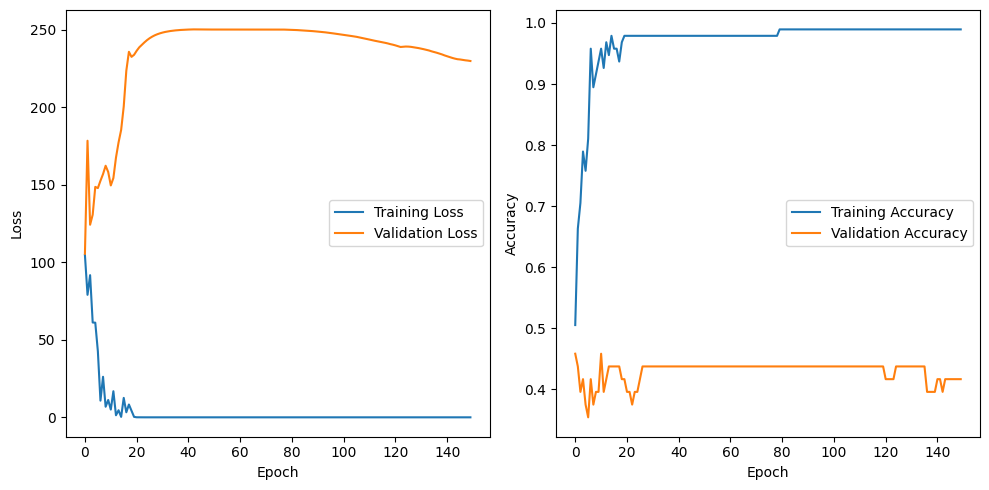

In [7]:
# Visualizations for the AI/ML model

# Plot training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

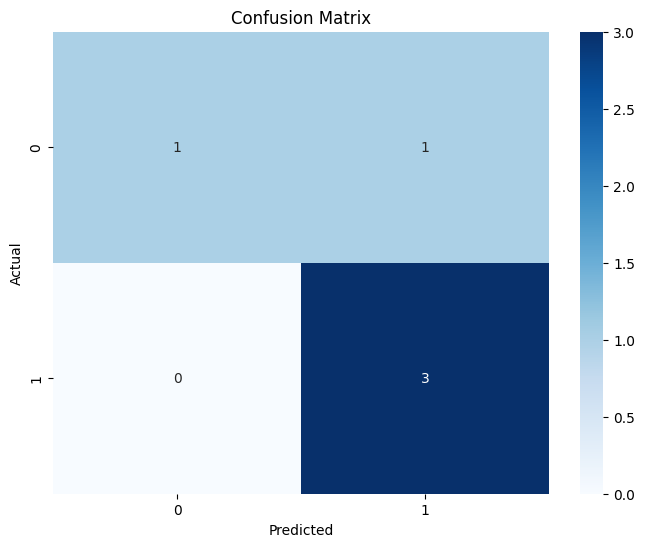

In [8]:
# Create a confusion matrix
cm = confusion_matrix(df.iloc[row_num_for_verification_of_model:, column_number_of_csv_having_labels], rounded)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

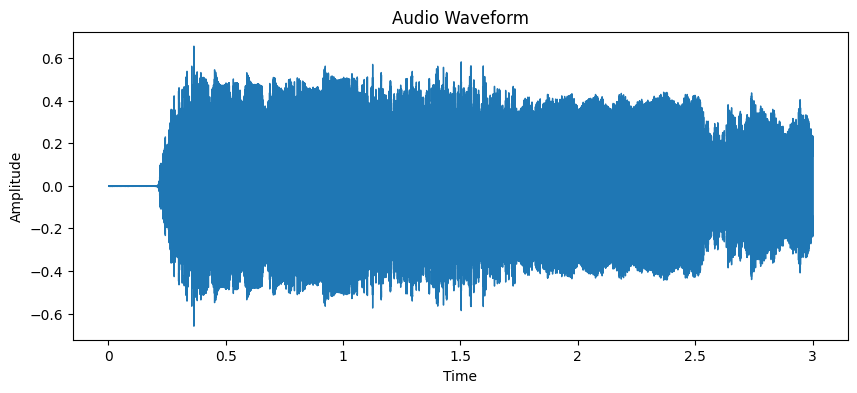

In [9]:
import librosa

filename = 'positive/damm_0.wav'

# Load audio file
audio, sr = librosa.load(filename)

# Plot the audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

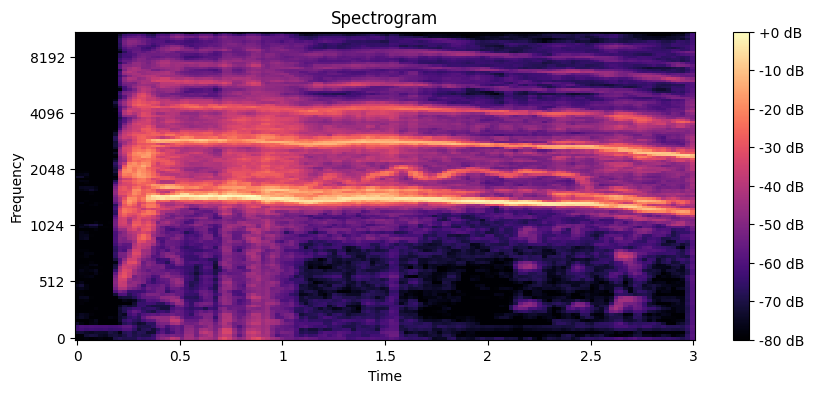

In [10]:
import librosa.display

# Compute and plot the spectrogram
plt.figure(figsize=(10, 4))
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.show()

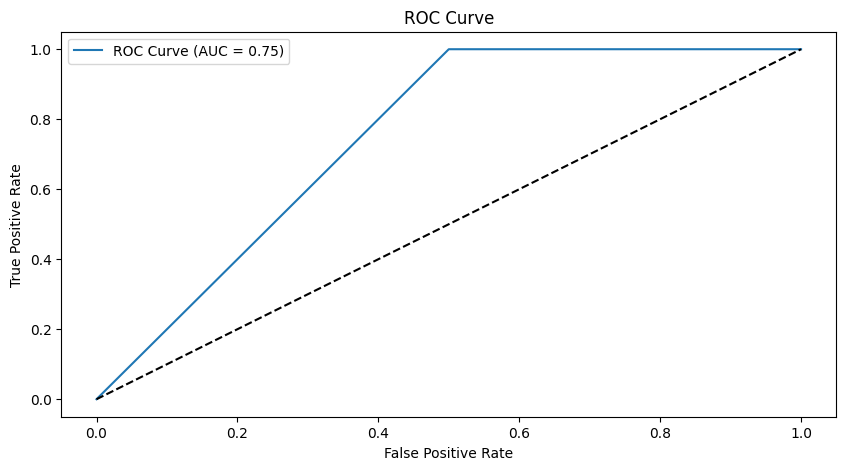

In [11]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(df.iloc[row_num_for_verification_of_model:, column_number_of_csv_having_labels], predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

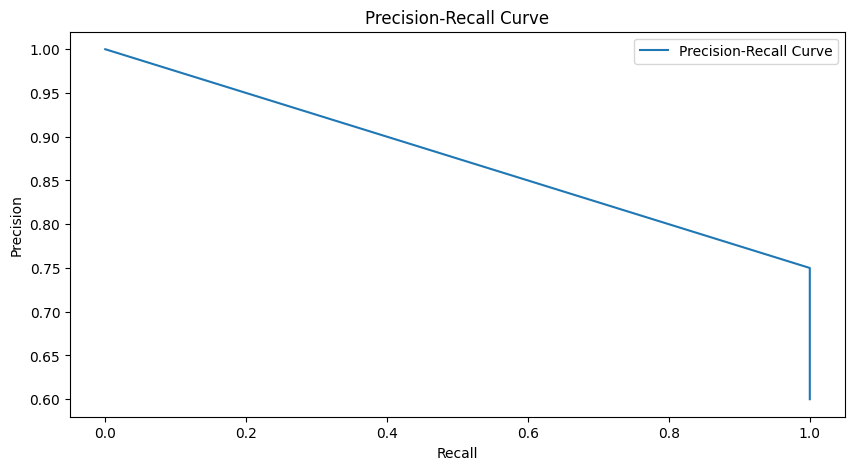

In [12]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(df.iloc[row_num_for_verification_of_model:, column_number_of_csv_having_labels], predictions)

# Plot precision-recall curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

In [13]:
output1 = svm_process(filename) 

print("model 1")
print(output1)

output2 = process_file(filename)               # it will process file in multilayer perceptron model

print("model 2")
print(output2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Phase-1 clear
model 1
True
positive/damm_0.wav


<ipython-input-2-077378066d45>:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  data, rs = read(filename)


1/1 [==============================] - 0s 82ms/step
model 2
False


In [14]:
if output1== True and output2 == True:
    pass    
    # call emergency funtion with higher risk currently we haven;t implemented emergency function
    text = "Emergency Alert! Risk is high. Send immediate help."
    print(text)
elif output1 == True or output2 == True:
    # call emergency function
    text = "Risk is Medium, calling officer in that neighbourhood"
    print(text)
    pass
else:
    print("SAFE")

Risk is Medium, calling officer in that neighbourhood
